# Projet 5 : Segmentez des clients d'un site e-commerce

On travaille comme consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.
Ma mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. On utilisera donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.
- Opérer une segmentation sur l’ensemble des clients:
- Une fois le modèle de segmentation choisi, proposer une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance;

Il s'agit d'un ensemble de données publiques de commerce électronique brésilien sur les commandes passées sur Olist Store. L'ensemble de données contient des informations sur 100 000 commandes de 2016 à 2018 effectuées sur plusieurs marchés au Brésil. Ses fonctionnalités permettent de visualiser une commande à partir de plusieurs dimensions : du statut de la commande, du prix, des performances de paiement et de fret à l'emplacement du client, aux attributs du produit et enfin aux avis rédigés par les clients. Nous avons également publié un ensemble de données de géolocalisation qui relie les codes postaux brésiliens aux coordonnées lat/lng.

## Segmentation de sa clientèle

### Définition:

- La segmentation de sa clientèle, aussi appelée segmentation du marché, sert à identifier et constituer des 
    groupes d'individus qui ont des caractéristiques semblables. L'homogénéité d'un groupe de consommateurs se
    définit par le croisement de plusieurs critères : socio-démographique : l'âge, le sexe, la profession, 
    psychologique : les avis et opinions, les centres d'intérêts, comportemental : les habitudes de consommation et
    d'achat. Dès lors que plusieurs personnes partagent les mêmes critères, alors ils forment un segment de la 
    clientèle. Il n'est cependant pas toujours utile de considérer l'ensemble de ces critères en fonction du 
    produit ou service vendu. Par exemple, le sexe ne va pas forcément influencer les habitudes de consommation 
    dans certains secteurs (exemple : le conseil aux entreprises). https://modelesdebusinessplan.com/blogs/infos/segmenter-clientele
  

### Methodologie :
il existe trois critères pour segmenter sa clientèle. 

Les critères socio-démographiques : on peut décomposer ces critères en trois catégories, les critères socio-économiques (revenu moyen, profession, CSP...), les critères démographiques (âge, situation familiale, sexe...) et les critères géographiques (lieu d'habitation et de travail). Ces critères sont généralement assez faciles à obtenir, via un sondage en ligne ou des données publiques. 

Les critères psychologiques : ces critères regroupent le mode de vie, les activités sportives et culturelles et les centres d'intérêts des consommateurs. Il s'agit des critères les plus importants mais aussi les plus difficiles à obtenir. 

Les critères d'habitudes de consommation : de la même manière que les critères psychologiques, connaître les habitudes d'achat est crucial mais aussi relativement difficile à identifier. Il s'agit de repérer la fréquence d'achat, le panier moyen, la valeur ajoutée recherchée par le client (design, fonctionnalité, prix...), le canal de distribution utilisé (boutique physique ou e-commerce), etc...

### BUT:

Pour résumer ces critères de segmentation, les critères socio-démographiques ont pour principal utilité d'identifier rapidement la personne, en lui donnant un nom, un âge et un lieu d'habitation. Les critères psychologiques et les habitudes de consommation servent à comprendre les attentes des clients et d'identifier comment l'entreprise peut répondre à ces besoins.


sources : https://www.codeur.com/blog/segmenter-clientele-booster-ventes/
        

Les données sont divisées en plusieurs ensembles de données pour une meilleure compréhension et organisation. Veuillez vous référer au schéma de données: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv 

## Sommaire:

## - I/ Nettoyage des données
   
## - II/ Analyse Exploratoire & Feature Engineering

# I/ Nettoyage des données

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno 
import seaborn as sns
%matplotlib inline
import datetime
import dataframe_image as dfi
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from datetime import date, timedelta, datetime

In [2]:
print("version numpy :" + np.__version__)
print("version pandas :" + pd.__version__)
print("version seaborn :" + sns.__version__)

version numpy :1.20.1
version pandas :1.2.4
version seaborn :0.11.1


In [3]:
customers = pd.read_csv("olist_customers_dataset.csv", sep=",")
geolocation = pd.read_csv("olist_geolocation_dataset.csv", sep=",")
order_items = pd.read_csv("olist_order_items_dataset.csv", sep=",")
order_payments = pd.read_csv("olist_order_payments_dataset.csv", sep=",")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv", sep=",")
orders = pd.read_csv("olist_orders_dataset.csv", sep=",")
products = pd.read_csv("olist_products_dataset.csv", sep=",")
sellers = pd.read_csv("olist_sellers_dataset.csv", sep=",")
product_category_name = pd.read_csv("product_category_name_translation.csv", sep=",")

In [4]:
def format_percentage(value):
    '''
    Format a percentage with 1 digit after comma 
    '''
    return "{0:.1f}%".format(value * 100)

# On crée d'un tableau contenant toutes les informations sur les 9 fichiers
files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen", "Doublons", "Description"],
                                 index = ["olist_customers_dataset.csv",
                                          "olist_geolocation_dataset.csv", 
                                          "olist_order_items_dataset.csv", 
                                          "olist_order_payments_dataset.csv", 
                                          "olist_order_reviews_dataset.csv", 
                                          "olist_orders_dataset.csv", 
                                         "olist_products_dataset.csv",
                                         "olist_sellers_dataset.csv",
                                          "product_category_name_translation.csv"])

# On remplit le nombre total de lignes dans chaque fichier
files_description["Nb lignes"] = [ len(customers.index),
                                   len(geolocation.index),
                                   len(order_items.index),
                                   len(order_payments.index),
                                   len(order_reviews.index),
                                   len(orders.index),
                                   len(products.index),
                                   len(sellers.index),
                                   len(product_category_name.index)]
                                   
# On remplit le nombre total de colonnes dans chaque fichier
files_description["Nb colonnes"] = [
                                    len(customers.columns),
                                    len(geolocation.columns),
                                    len(order_items.columns),
                                    len(order_payments.columns),
                                    len(order_reviews.columns),
                                    len(orders.columns),
                                    len(products.columns),
                                    len(sellers.columns),
                                    len(product_category_name.columns)]

# On remplit le centile de remplissage de chaque fichier
# On utilise la fonction mean() deux fois pour calculer la moyenne de chaque colonne, puis la moyenne de l'ensemble du fichier
files_description["Taux remplissage moyen"] = [
    format_percentage(customers.notna().mean().mean()),
    format_percentage(geolocation.notna().mean().mean()),
    format_percentage(order_items.notna().mean().mean()),
    format_percentage(order_payments.notna().mean().mean()),
    format_percentage(order_reviews.notna().mean().mean()),
    format_percentage(orders.notna().mean().mean()),
    format_percentage(products.notna().mean().mean()),
    format_percentage(sellers.notna().mean().mean()),
    format_percentage(product_category_name.notna().mean().mean())
]

# On ajoute le nombre de doublon pour chaque fichier
files_description["Doublons"] = [
    customers.duplicated().sum(),
    geolocation.duplicated().sum(),
    order_items.duplicated().sum(),
    order_payments.duplicated().sum(),
    order_reviews.duplicated().sum(),
    orders.duplicated().sum(),
    products.duplicated().sum(),
    sellers.duplicated().sum(),
    product_category_name.duplicated().sum()
]

# j'ajoute une courte description pour chaque fichier
files_description["Description"] = [
    "Cet ensemble de données contient des informations sur le client et son emplacement.",
    "Cet ensemble de données contient des informations sur les codes postaux brésiliens et ses coordonnées lat/lng.",
    "Cet ensemble de données comprend des données sur les articles achetés dans chaque commande.",
    "Cet ensemble de données comprend des données sur les options de paiement des commandes.",
    "Cet ensemble de données comprend des données sur les avis rédigés par les clients.",
    "Il s'agit de l'ensemble de données de base. De chaque commande, vous pouvez trouver toutes les autres informations.",
    "Cet ensemble de données comprend des données sur les produits vendus par Olist.",
    "Cet ensemble de données comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist.",
    "Traduit le nom de la catégorie de produit en anglais."]

In [5]:
files_description

,Nb lignes,Nb colonnes,Taux remplissage moyen,Doublons,Description
olist_customers_dataset.csv,99441,5,100.0%,0,Cet ensemble de données contient des informati...
olist_geolocation_dataset.csv,1000163,5,100.0%,261831,Cet ensemble de données contient des informati...
olist_order_items_dataset.csv,112650,7,100.0%,0,Cet ensemble de données comprend des données s...
olist_order_payments_dataset.csv,103886,5,100.0%,0,Cet ensemble de données comprend des données s...
olist_order_reviews_dataset.csv,99224,7,79.0%,0,Cet ensemble de données comprend des données s...
olist_orders_dataset.csv,99441,8,99.4%,0,Il s'agit de l'ensemble de données de base. De...
olist_products_dataset.csv,32951,9,99.2%,0,Cet ensemble de données comprend des données s...
olist_sellers_dataset.csv,3095,4,100.0%,0,Cet ensemble de données comprend des données s...
product_category_name_translation.csv,71,2,100.0%,0,Traduit le nom de la catégorie de produit en a...


In [6]:
##adding a gradient based on values in cell
df_styled = files_description.style.background_gradient()

In [7]:
#exporte le dataframe au format png
dfi.export(df_styled,"datasets.png")

In [8]:
#![](HRhd2Y0.png) # On peut utiliser également ce code pour afficher l'image en mettant la cellule en "Markdown"
# < img src="HRhd2Y0.png)" style="width:200px;height:200px"/> # affiche également l'image voir comment au change le format

def render_pic_in_notebook(location_file = 'HRhd2Y0.png',
                           set_size_inches = [19,9]):
    """making notebook more visual"""
    img=mpimg.imread(location_file)
    # end
    # from now on you can use img as an image, but make sure you know what you are doing!
    imgplot=plt.imshow(img)
    plt.gcf().set_size_inches(set_size_inches[0], set_size_inches[1])
    plt.axis('off')
    plt.show()

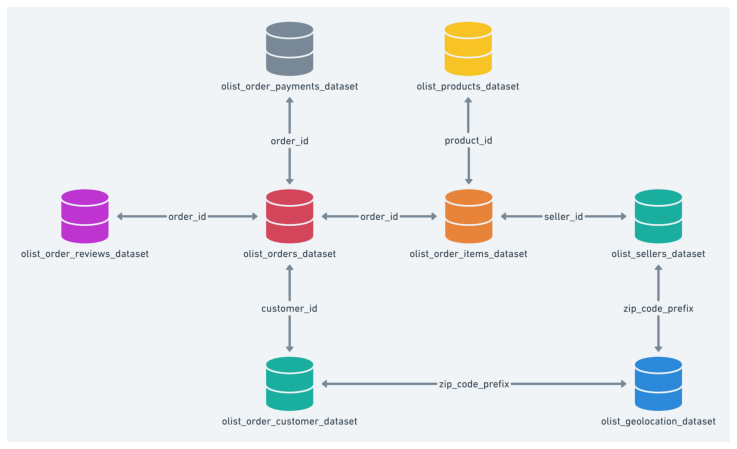

In [9]:
render_pic_in_notebook(location_file = 'HRhd2Y0.png',set_size_inches = [16,8])

In [10]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [11]:
customers.describe(include="O")

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,a5d2b093ce49ccdc64bedb68b856ac5e,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

### Observations:
- Il y a plus de valeurs uniques pour "customer_id" que pour "customer_unique_id" ???
--> customer_unique_id lié à une cde et un client

In [14]:
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [15]:
geolocation.describe(include ="O")

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


In [16]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

### Observations:
- Il y a plus de villes pour "geolocation_city" que pour "customer_city" ???

In [17]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [18]:
order_items.describe(include="O")

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48
freq,21,527,2033,21


In [19]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [20]:
order_items.shipping_limit_date

0         2017-09-19 09:45:35
1         2017-05-03 11:05:13
2         2018-01-18 14:48:30
3         2018-08-15 10:10:18
4         2017-02-13 13:57:51
                 ...         
112645    2018-05-02 04:11:01
112646    2018-07-20 04:31:48
112647    2017-10-30 17:14:25
112648    2017-08-21 00:04:32
112649    2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: object

### Observations:
- Il y a 21 "order_item_id" différents ???
- format date "shipping_limit_date" renvoie type object? transformer en "datetime64"?

In [21]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [22]:
order_payments.describe(include="O")

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


### Observations:
- Il y a plus de valeurs uniques pour "customer_id" que pour "customer_unique_id" ???

In [23]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [24]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

review_score

In [25]:
order_reviews.review_creation_date

0        2018-01-18 00:00:00
1        2018-03-10 00:00:00
2        2018-02-17 00:00:00
3        2017-04-21 00:00:00
4        2018-03-01 00:00:00
                ...         
99219    2018-07-07 00:00:00
99220    2017-12-09 00:00:00
99221    2018-03-22 00:00:00
99222    2018-07-01 00:00:00
99223    2017-07-03 00:00:00
Name: review_creation_date, Length: 99224, dtype: object

In [26]:
order_reviews.review_answer_timestamp

0        2018-01-18 21:46:59
1        2018-03-11 03:05:13
2        2018-02-18 14:36:24
3        2017-04-21 22:02:06
4        2018-03-02 10:26:53
                ...         
99219    2018-07-14 17:18:30
99220    2017-12-11 20:06:42
99221    2018-03-23 09:10:43
99222    2018-07-02 12:59:13
99223    2017-07-03 21:01:49
Name: review_answer_timestamp, Length: 99224, dtype: object

### Observations:
- On constate qu'on des "NaN" uniquement pour les commentaires. C'est à dire qu'on a des commentaires vides;
- formats dates "review_answer_timestamp" et "review_creation_date" renvoient type "object"? transformer en "datetime64"?

In [27]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [28]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [29]:
orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [30]:
orders.describe(include="O")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,981f5cf29634672b36363c9ca9d4c3a4,3fca3da78bc98eb6566ce7daa59acfa3,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Observations:
- Il y a plusieurs variables "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date" et "order_estimated_delivery_date" avec un format de type "object"? transformer en type "datetime64".

- On constate qu'il y a des "NaN" pour les variables "order_delivered_carrier_date", "order_delivered_carrier_date" et "order_delivered_customer_date".Les "NaN" sont croissants à partir de 3 étapes (validation de la commande, date de livraison au transporteur et date de livraison au client). Apparemment, on doit rencontrer des problèmes avec ses 3 étapes d'achat.
- On a différents status de commande selon l'étape où l'on est dans le processus (commande livrée, facturée, expédiée, en traitement, non disponible, annulée, créée et approuvée). On va par la suite sélectionner les commandes livrées ("delivered").

In [31]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [32]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [33]:
products.describe(include="O")

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1eb5b06a73df439c29be30c762965ce3,cama_mesa_banho
freq,1,3029


In [34]:
products["product_width_cm"].isna().sum()

2

In [35]:
products[products["product_width_cm"].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:
- Il y a 73 noms de catégories de produits différents.

On constate qu'on a des "NaN" dans 4 variables "product_category_name", "product_name_lenght", "product_description_lenght" et "product_photos_qty". C'est à dire que certains produits manquent d'informations sur leurs produits.

In [36]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [37]:
sellers.describe(include="O")

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,ce4755084bc097113867e6454f8f5e52,sao paulo,SP
freq,1,694,1849


### Observations:
- Il y a 23 états différents la variable "seller_state" alors qu'il y en a 27 pour "customers_state".
- On peut écarter ce dataset car les vendeurs ne sont pas l'objet de cette segmentation.

In [38]:
product_category_name.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [39]:
product_category_name.describe(include="O")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,pet_shop,pet_shop
freq,1,1


### Observations:
- par rapport au dataset "products", il y a 2 noms de catégories qui n'ont pas été traduites.

In [40]:
#Sauvegarde des données sources
customers_net = customers.copy(deep=True)
geolocation_net = geolocation.copy(deep=True)
order_items_net = order_items.copy(deep=True)
order_payments_net = order_payments.copy(deep=True)
order_reviews_net = order_reviews.copy(deep=True)
orders_net = orders.copy(deep=True)
products_net = products.copy(deep=True)
sellers_net = sellers.copy(deep=True)
product_category_name_net = product_category_name.copy(deep=True)


In [41]:
#Traitement des doublons
geolocation_net.drop_duplicates(inplace=True)

In [42]:
geolocation_net.duplicated().sum()

0

In [43]:
orders_net.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [44]:
#Traitement des NaN

# dataset order_reviews_net
# On remplace les NaN par une annotation 'Not_mentioned'(pas mentionnée)
order_reviews_net['review_comment_title'].fillna('Not_mentioned', inplace=True)
order_reviews_net['review_comment_message'].fillna('Not_mentioned', inplace=True)

# dataset products_net    
products_net['product_category_name'].fillna('Not_mentioned', inplace=True)
products_net['product_name_lenght'].fillna(0, inplace=True)
products_net['product_description_lenght'].fillna(0, inplace=True)
products_net['product_photos_qty'].fillna(0, inplace=True)
products_net['product_weight_g'].fillna(0, inplace=True)
products_net['product_length_cm'].fillna(0, inplace=True)
products_net['product_height_cm'].fillna(0, inplace=True)
products_net['product_width_cm'].fillna(0, inplace=True)

#traitement des types "object" qui renvoient un "datatimes"
# dataset order_items_net 
order_items_net['shipping_limit_date'] = order_items_net['shipping_limit_date'].astype('datetime64')
# dataset order_reviews_net
order_reviews_net['review_creation_date'] = order_reviews_net['review_creation_date'].astype('datetime64')
order_reviews_net['review_answer_timestamp'] = order_reviews_net['review_answer_timestamp'].astype('datetime64')
# dataset order_items_net 
orders_net['order_purchase_timestamp'] = orders_net['order_purchase_timestamp'].astype('datetime64')
orders_net['order_approved_at'] = orders_net['order_approved_at'].astype('datetime64')
orders_net['order_delivered_carrier_date'] = orders_net['order_delivered_carrier_date'].astype('datetime64')
orders_net['order_delivered_customer_date'] = orders_net['order_delivered_customer_date'].astype('datetime64')
orders_net['order_estimated_delivery_date'] = orders_net['order_estimated_delivery_date'].astype('datetime64')

In [45]:
date_achat = orders_net["order_purchase_timestamp"]
date_livr = orders_net["order_estimated_delivery_date"]

time_diff = date_livr - date_achat
time = date_livr - (time_diff/2)

In [46]:
#Traitement des NaN
# dataset order_net    
orders_net['order_approved_at'].fillna(orders_net["order_purchase_timestamp"], inplace=True)
orders_net['order_delivered_carrier_date'].fillna(time, inplace=True)### faire mediane entre deux datetimes#####
orders_net['order_delivered_customer_date'].fillna(orders_net["order_estimated_delivery_date"], inplace=True)

### On va créer un dataset plus complet en supprimant les variables non pertinentes dans notre RFM (par exemple, Récence : durée depuis la dernière commande, Fréquence : nombre d'article dans une commande, Montant: montant  des achats).

In [47]:
#Produits et catégories

products_net = pd.merge(products_net, product_category_name_net).drop(['product_category_name'], axis=1)
#On renomme "product_category_name_english" en "product_category_name"
products_net = products_net.rename(columns={"product_category_name_english":
                                    "product_category_name"})

products_net.drop(["product_weight_g","product_length_cm", "product_height_cm","product_width_cm"], axis=1, inplace=True)

In [48]:
products_net.head(5)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,perfumery


In [49]:
products_net.shape

(32328, 5)

In [50]:
#Commandes et Clients

order_items_net = pd.merge(order_items_net, orders_net)

order_items_net.drop(["seller_id", "shipping_limit_date","order_approved_at","order_delivered_carrier_date",
                     "order_estimated_delivery_date"], axis=1, inplace=True)

In [51]:
order_items_net.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31


In [52]:
#On va conserver uniquement les commandes ayant le statut délivré (delivered)
order_items_net.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

In [53]:
order_items_net.shape

(112650, 9)

In [54]:
# Et on va sélectionner les lignes avec le statut "delivered"
order_items_net = order_items_net[order_items_net["order_status"] == "delivered"]

In [55]:
order_items_net.shape

(110197, 9)

In [56]:
order_items_net.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


## II/ Feature Engineering & Analyse Exploratoire

## - Feature Engineering

In [57]:
#Evolution du nombre de commandes passées par jour
orders_date = order_items_net.groupby(order_items_net["order_purchase_timestamp"].dt.date).count()["order_id"]
orders_date

order_purchase_timestamp
2016-09-15     3
2016-10-03     7
2016-10-04    63
2016-10-05    48
2016-10-06    47
              ..
2018-08-25    75
2018-08-26    82
2018-08-27    71
2018-08-28    45
2018-08-29    16
Name: order_id, Length: 612, dtype: int64

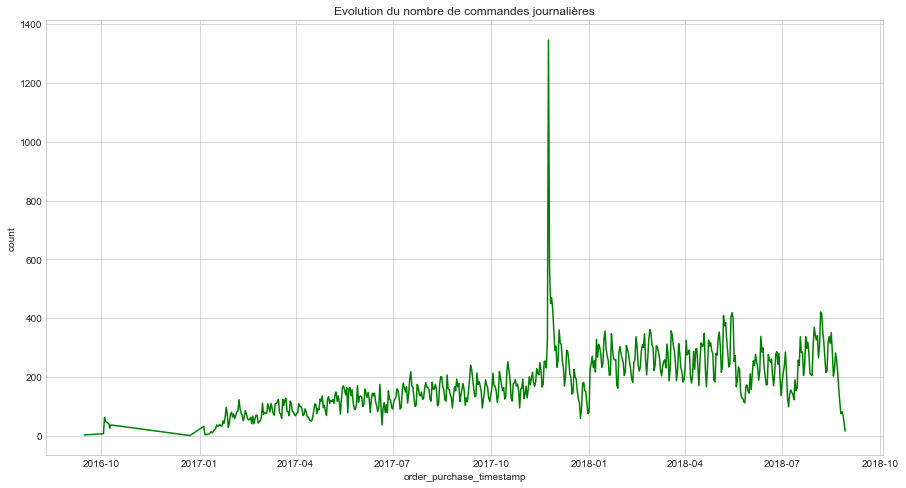

In [58]:
fig = plt.figure(figsize=(15, 8))
ax = orders_date.plot(color="g")
ax.set_ylabel("count")
plt.title("Evolution du nombre de commandes journalières")
plt.show()

constats:
- on a une période où il n'y pas de commande entre octobre 2016 et janvier 2017.
- On a un pic aux alentours de la fin de l'année 2017. Ce qui pourrait correspondre aux achats de fin d'année pour Noël.

In [59]:
#Evolution du nombre de commandes passées par mois
orders_month = order_items_net.groupby(order_items_net['order_purchase_timestamp'].dt.month).count()["order_id"]
orders_month

order_purchase_timestamp
1      8950
2      9376
3     10914
4     10396
5     11814
6     10499
7     11379
8     11939
9      4740
10     5527
11     8475
12     6188
Name: order_id, dtype: int64

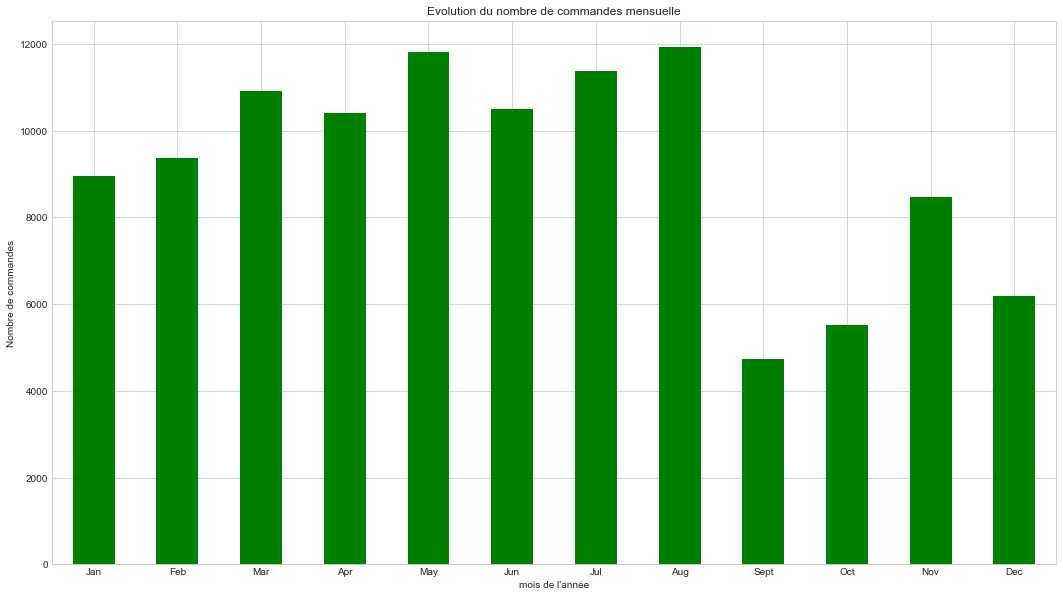

In [60]:
fig = plt.figure(figsize=(18, 10))
ax = orders_month.plot(color="g", kind="bar")
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], rotation='horizontal')
ax.set_ylabel("Nombre de commandes")
ax.set_xlabel("mois de l'année")
plt.title("Evolution du nombre de commandes mensuelle")
plt.show()

In [61]:
#nombre de commandes dans la semaine
orders_days = order_items_net.groupby(order_items_net['order_purchase_timestamp'].dt.dayofweek).count()["order_id"]
orders_days

order_purchase_timestamp
0    17973
1    17858
2    17219
3    16434
4    15698
5    11885
6    13130
Name: order_id, dtype: int64

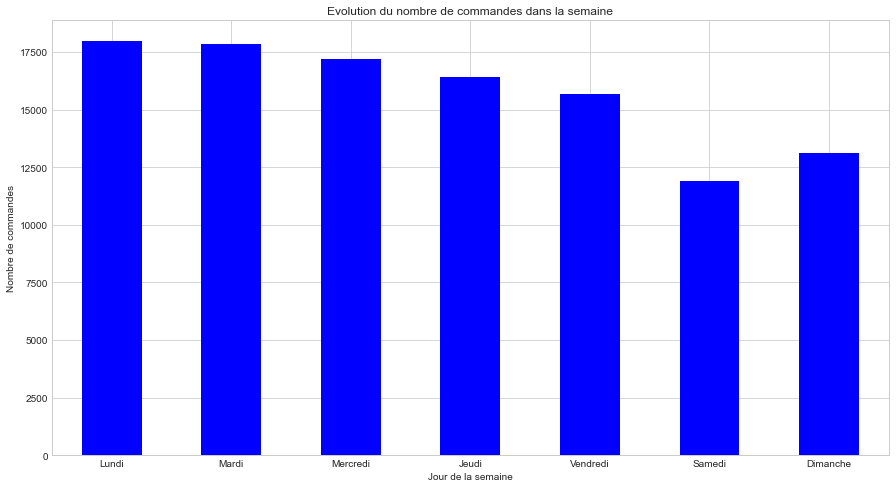

In [62]:
fig = plt.figure(figsize=(15, 8))
ax = orders_days.plot(color="b", kind="bar")
plt.xticks(np.arange(0,7), ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'], rotation='horizontal')
ax.set_ylabel("Nombre de commandes")
ax.set_xlabel("Jour de la semaine")
plt.title("Evolution du nombre de commandes dans la semaine")
plt.show()

In [63]:
# Quantité de produits achetés par client "customer_id"
#data_orders_id = pd.merge(order_items_net, orders_net)
#data_produits_par_client = pd.merge(customers_net, data_orders_id)
#qte_produits = data_produits_par_client.groupby('customer_id')['product_id'].count()
#qte_produits.rename('Qty_pdt_customer', inplace=True)

In [64]:
# Quantité de produits achetés par client "customer_unique_id"
data_orders_id = pd.merge(order_items_net, orders_net)
data_produits_par_client = pd.merge(customers_net, data_orders_id)
qte_produits = data_produits_par_client.groupby('customer_unique_id')['product_id'].count()
qte_produits.rename('Qty_pdt_customer', inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: Qty_pdt_customer, Length: 93358, dtype: int64

In [65]:
qte_produits.isna().sum()

0

In [66]:
#Evolution du nombre de commandes passées dans la journée
orders_hour = order_items_net.groupby(order_items_net['order_purchase_timestamp'].dt.hour).count()["order_id"]
orders_hour

order_purchase_timestamp
0     2655
1     1264
2      575
3      299
4      242
5      213
6      533
7     1343
8     3337
9     5346
10    6881
11    7272
12    6661
13    7224
14    7415
15    7214
16    7479
17    6839
18    6390
19    6577
20    6733
21    6757
22    6399
23    4549
Name: order_id, dtype: int64

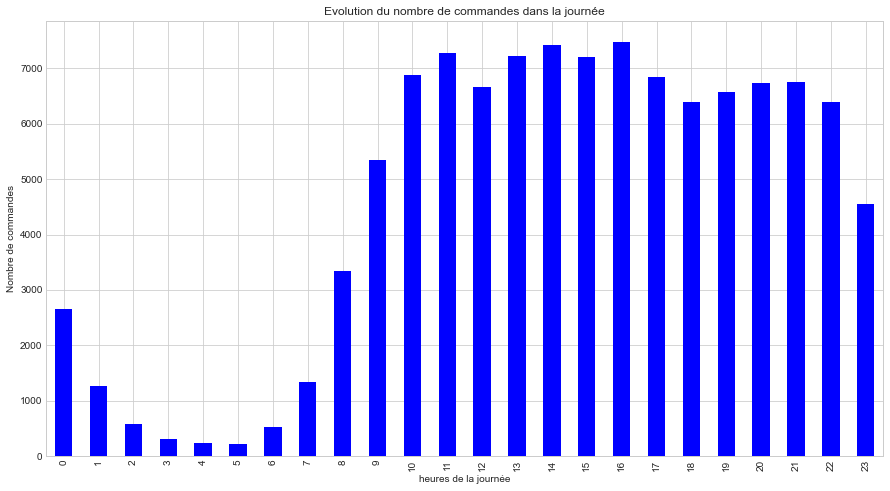

In [67]:
fig = plt.figure(figsize=(15, 8))
ax = orders_hour.plot(color="b", kind="bar")
ax.set_ylabel("Nombre de commandes")
ax.set_xlabel("heures de la journée")
plt.title("Evolution du nombre de commandes dans la journée")
plt.show()

In [68]:
order_items_net.describe()

,order_item_id,price,freight_value
count,110197.000000,110197.000000,110197.000000
mean,1.198181,119.980563,19.948598
std,0.706676,182.299446,15.698136
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.900000,16.260000
75%,1.000000,134.170000,21.150000
max,21.000000,6735.000000,409.680000


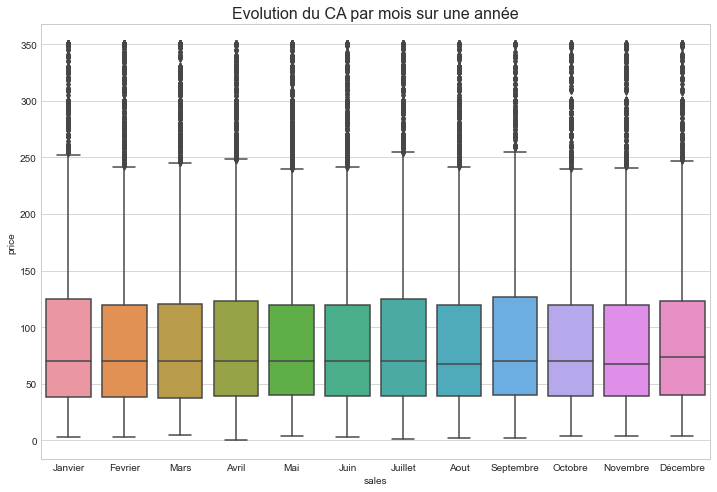

In [69]:
##### Evolution du CA dans l'année (par mois)

#Evolution du nombre de commande par mois
order_items_net["sales"] = order_items_net['order_purchase_timestamp'].dt.month
# boites à moustaphe
fig = plt.figure(figsize=(12,8))
#On a vu que 75% des commandes ont un panier à 135 réals brésilien (1 réal brésilien = 0,20 euro) 
# et 100% à 6735 réals.
sns.boxplot(data=order_items_net[order_items_net.price < 350], x= "sales", y="price")
plt.xticks(np.arange(0,12), ['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre'], rotation='horizontal')

plt.title("Evolution du CA par mois sur une année", fontsize=16)
plt.show()

On observe qu'au "delà" de 240 réals (environs), on a des outliers sur tous les mois de l'année.

In [70]:
# Quantité de commande par client
data_orders_id = pd.merge(order_items_net, orders_net)
data_cdes_par_client = pd.merge(customers_net, data_orders_id)
qte_client_cdes = data_cdes_par_client.groupby('customer_id')['order_id'].count()
qte_client_cdes.rename('qte_customer_orders', inplace=True)


customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Name: qte_customer_orders, Length: 96478, dtype: int64

In [71]:
tx_client_cdes = (qte_client_cdes.value_counts()/len(qte_client_cdes))*100
print("répartition des client par quantité de commande")
print(qte_client_cdes.value_counts())
print(" ")
print("taux de client par quantité de commande")
print(tx_client_cdes)

répartition des client par quantité de commande
1     86843
2      7392
3      1306
4       495
5       193
6       191
7        22
8         8
10        8
12        5
11        4
9         3
14        2
15        2
20        2
13        1
21        1
Name: qte_customer_orders, dtype: int64
 
taux de client par quantité de commande
1     90.013267
2      7.661850
3      1.353676
4      0.513070
5      0.200046
6      0.197973
7      0.022803
8      0.008292
10     0.008292
12     0.005183
11     0.004146
9      0.003110
14     0.002073
15     0.002073
20     0.002073
13     0.001037
21     0.001037
Name: qte_customer_orders, dtype: float64


In [72]:
# Catégories des produit achetés par un client

categ = pd.merge(data_produits_par_client, products_net)
categ = categ.sort_values(['customer_id','product_category_name'], ascending=False).groupby(
['customer_id','product_category_name']).head(1)[['customer_unique_id', 'product_category_name']]
 
categ.columns = ['customer_unique_id', 'Most_purchased_categ']
categ.set_index('customer_unique_id', inplace=True)

In [73]:
categ.head(3)

,Most_purchased_categ
customer_unique_id,
48fd7dec70f2b104a1d5e8c5c639102b,furniture_decor
680213db6ebd9e4f24d03280cbe10346,bed_bath_table
afbb5a642107cf6bb1ca68e863175f03,telephony


In [74]:
# On va merger sur le dataset "customers_net"
order_items_net = pd.merge(order_items_net, customers_net, how="outer", on="customer_id")
order_items_net.head(2)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sales,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP


In [75]:
# Montant moyen des achats
avg_purchases = pd.merge(order_items_net, orders_net)
avg_purchases = avg_purchases.groupby(['customer_unique_id', 'order_id'])['price'].sum().groupby(['customer_unique_id']).mean()
avg_purchases.rename('Avg_purchases', inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      18.90
0000f46a3911fa3c0805444483337064      69.00
0000f6ccb0745a6a4b88665a16c9f078      25.99
0004aac84e0df4da2b147fca70cf8255     180.00
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    1570.00
fffea47cd6d3cc0a88bd621562a9d061      64.89
ffff371b4d645b6ecea244b27531430a      89.90
ffff5962728ec6157033ef9805bacc48     115.00
ffffd2657e2aad2907e67c3e9daecbeb      56.99
Name: Avg_purchases, Length: 93358, dtype: float64

In [76]:
# Quantité moy de produits par cde
#Avg_qty_prod_id = pd.merge(order_items_net, orders_net)
#Avg_qty_prod_id = Avg_qty_prod.groupby(['customer_id', 'order_id'])['price'].count().groupby(['customer_id']).mean()
#Avg_qty_prod_id.rename('Avg_qty_prod_order_id', inplace=True)


In [77]:
# Quantité moy de produits par cde
Avg_qty_prod = pd.merge(order_items_net, orders_net)
Avg_qty_prod = Avg_qty_prod.groupby(['customer_unique_id', 'order_id'])['price'].count().groupby(['customer_unique_id']).mean()
Avg_qty_prod.rename('Avg_qty_prod_order', inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1.0
0000b849f77a49e4a4ce2b2a4ca5be3f    1.0
0000f46a3911fa3c0805444483337064    1.0
0000f6ccb0745a6a4b88665a16c9f078    1.0
0004aac84e0df4da2b147fca70cf8255    1.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    2.0
fffea47cd6d3cc0a88bd621562a9d061    1.0
ffff371b4d645b6ecea244b27531430a    1.0
ffff5962728ec6157033ef9805bacc48    1.0
ffffd2657e2aad2907e67c3e9daecbeb    1.0
Name: Avg_qty_prod_order, Length: 93358, dtype: float64

In [78]:
#délai moyen de livraison  
avg_delivery_time = pd.merge(orders_net, order_items_net)
avg_delivery_time.set_index('customer_unique_id', inplace=True)
avg_delivery_time = (avg_delivery_time['order_delivered_customer_date'] - avg_delivery_time['order_purchase_timestamp']).dt.days
avg_delivery_time.rename('Avg_delivery', inplace=True)

customer_unique_id
7c396fd4830fd04220f754e42b4e5bff     8
af07308b275d755c9edb36a90c618231    13
3a653a41f6f9fc3d2a113cf8398680e8     9
7c142cf63193a1473d2e66489a9ae977    13
72632f0f9dd73dfee390c9b22eb56dd6     2
                                    ..
da62f9e57a76d978d02ab5362c509660    22
737520a9aad80b3fbbdad19b66b37b30    24
5097a5312c8b157bb7be58ae360ef43c    17
5097a5312c8b157bb7be58ae360ef43c    17
60350aa974b26ff12caad89e55993bd6     7
Name: Avg_delivery, Length: 110197, dtype: int64

In [79]:
avg_delivery_time.head(2)

customer_unique_id
7c396fd4830fd04220f754e42b4e5bff     8
af07308b275d755c9edb36a90c618231    13
Name: Avg_delivery, dtype: int64

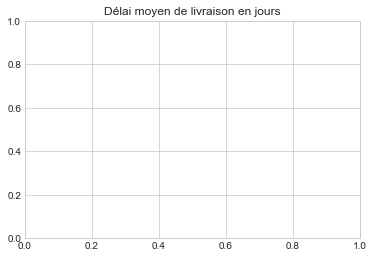

In [80]:
#fig = plt.figure(figsize=(18, 10))
#ax = avg_delivery_time.plot(color="b", kind="bar")
ax.set_ylabel("Nombre de commandes")
ax.set_xlabel("Nombre de jours")
plt.title("Délai moyen de livraison en jours")
plt.show()

In [81]:
# Heure du dernier achat
date_purchase = pd.merge(order_items_net, orders_net)[['customer_unique_id', 'order_purchase_timestamp']]
date_purchase = date_purchase.groupby(['customer_unique_id']).max()
date_purchase['hour_purchase'] = date_purchase['order_purchase_timestamp'].apply(lambda x: x.hour)

#Jour de la semaine du dernier achat
date_purchase['day_purchase'] = date_purchase['order_purchase_timestamp'].apply(lambda x: x.weekday())


In [82]:
date_purchase.head(2)

,order_purchase_timestamp,hour_purchase,day_purchase
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,10,3
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,11,0


In [83]:
date_purchase['hour_purchase'].unique()

array([10, 11, 21, 20, 19, 12, 23, 15,  9, 14, 13, 22, 16, 17, 18,  0,  1,
        7,  8,  4,  2,  3,  6,  5])

In [84]:
#temps écoulé depuis le dernier achat
date_purchase['last_purchase_delay'] = date_purchase['order_purchase_timestamp'].max() -  date_purchase[
    'order_purchase_timestamp']
date_purchase['last_purchase_delay'] = date_purchase['last_purchase_delay'].apply(lambda x: x.days)
date_purchase['last_purchase_delay']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    111
0000b849f77a49e4a4ce2b2a4ca5be3f    114
0000f46a3911fa3c0805444483337064    536
0000f6ccb0745a6a4b88665a16c9f078    320
0004aac84e0df4da2b147fca70cf8255    287
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    446
fffea47cd6d3cc0a88bd621562a9d061    261
ffff371b4d645b6ecea244b27531430a    567
ffff5962728ec6157033ef9805bacc48    118
ffffd2657e2aad2907e67c3e9daecbeb    483
Name: last_purchase_delay, Length: 93358, dtype: int64

In [85]:
#On va créer une nouvelle variable reprenant la moyenne des notes
mean_score = order_reviews_net.groupby("order_id").agg({"review_score": "mean"})
order_items_net = pd.merge(order_items_net, mean_score, how="left", on="order_id")
order_items_net = order_items_net.rename(columns={"review_score": "review_score_mean"})
order_items_net.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sales,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score_mean
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,5.0
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,4.0
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,5.0
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,5.0


In [86]:
order_payments_net.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [87]:
#mode de paiement
payment_method = pd.merge(orders_net, order_payments_net).sort_values(
        ['customer_id','payment_type','payment_installments'],ascending=False).groupby(
        ['customer_id', 'payment_type','payment_installments']).head(1)[[
        'customer_id', 'payment_type','payment_installments']]
payment_method.columns = ['customer_id', 'payment_type','payment_installments']
payment_method.set_index('customer_id', inplace=True)

In [88]:
payment_method.payment_type.unique()

array(['boleto', 'credit_card', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [89]:
payment_method.head(3)

,payment_type,payment_installments
customer_id,,
ffffe8b65bbe3087b653a978c870db99,boleto,1
ffffa3172527f765de70084a7e53aae8,credit_card,4
ffff42319e9b2d713724ae527742af25,credit_card,2


In [90]:
# Distribution des moyens de paiment en %
(payment_method.payment_type.value_counts()/len(payment_method.payment_type))*100

credit_card    75.272988
boleto         19.427315
voucher         3.796300
debit_card      1.500452
not_defined     0.002946
Name: payment_type, dtype: float64

In [91]:
#On va créer 2 nouvelles features avec le nombre de moyen de paiements et la somme des échéances
pay_agg = order_payments_net.groupby(by="order_id").agg({"payment_sequential":'count',"payment_installments":'sum'})
order_items_net = pd.merge(order_items_net, pay_agg, how="left", on="order_id")
order_items_net = order_items_net.rename(columns={ "payment_sequential": "payment_sequential_count","payment_installments": "payment_installments_sum"})
order_items_net.head(5)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sales,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score_mean,payment_sequential_count,payment_installments_sum
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,5.0,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,4.0,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,5.0,1.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,8.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,4.0,1.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,5.0,1.0,3.0


In [92]:
#order_items_net["payment_sequential_count"].value_counts()

In [93]:
#order_payments_net["payment_sequential"].value_counts()

In [94]:
# On va merger sur le dataset "products_net" (avec les produits)
data_net = pd.merge(order_items_net, products_net, how="outer", on="product_id")
data_net.head(2)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sales,...,customer_zip_code_prefix,customer_city,customer_state,review_score_mean,payment_sequential_count,payment_installments_sum,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9.0,...,28013.0,campos dos goytacazes,RJ,5.0,1.0,2.0,58.0,598.0,4.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-07-13 20:39:29,6.0,...,75800.0,jatai,GO,5.0,1.0,1.0,58.0,598.0,4.0,cool_stuff


In [95]:
data_net.isna().sum()

order_id                         3670
order_item_id                    3670
product_id                       2963
price                            3670
freight_value                    3670
customer_id                       707
order_status                     3670
order_purchase_timestamp         3670
order_delivered_customer_date    3670
sales                            3670
customer_unique_id                707
customer_zip_code_prefix          707
customer_city                     707
customer_state                    707
review_score_mean                4497
payment_sequential_count         3673
payment_installments_sum         3673
product_name_lenght              4522
product_description_lenght       4522
product_photos_qty               4522
product_category_name            4522
dtype: int64

In [96]:
'''
Annuler
on va merger les différentes features pour avoir nouveau dataframe

data_feat1 = pd.merge(qte_produits,qte_client_cdes, how='outer',left_on="customer_id",right_on ="customer_id")
data_feat2 = pd.merge(data_feat1, avg_purchases, how='outer',left_on="customer_id",right_on ="customer_id")
data_feat3 = pd.merge(data_feat2, Avg_qty_prod, how='outer',left_on="customer_id",right_on ="customer_id")
data_feat4 = pd.merge(data_feat3, avg_delivery_time, how='outer',left_on="customer_id",right_on ="customer_id")
data_feat5 = pd.merge(data_feat4, date_purchase['day_purchase'], how='outer',left_on="customer_id",right_on ="customer_id")
data_feat6 = pd.merge(data_feat5, date_purchase['hour_purchase'], how='outer',left_on="customer_id",right_on ="customer_id")
data_feat7 = pd.merge(data_feat6, date_purchase['last_purchase_delay'], how='outer',left_on="customer_id",right_on ="customer_id")
data_feat8 = pd.merge(data_feat7, average_grade, how='outer',left_on="customer_id",right_on ="customer_id")
data_feat9 = pd.merge(data_feat8, payment_method, how='outer',left_on="customer_id",right_on ="customer_id")
data_feat10 = pd.merge(customers,categ, how='outer',left_on="customer_unique_id",right_on ="customer_unique_id")
data_feat11 = pd.merge(data_feat9,data_feat10, how='outer',left_on="customer_id",right_on ="customer_id") #customer_unique_id
data_feat   = pd.merge(data_feat11, geolocation_net, how='outer', left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix')#.groupby(
                                'customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']].reset_index()

'''

'\nAnnuler\non va merger les différentes features pour avoir nouveau dataframe\n\ndata_feat1 = pd.merge(qte_produits,qte_client_cdes, how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat2 = pd.merge(data_feat1, avg_purchases, how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat3 = pd.merge(data_feat2, Avg_qty_prod, how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat4 = pd.merge(data_feat3, avg_delivery_time, how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat5 = pd.merge(data_feat4, date_purchase[\'day_purchase\'], how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat6 = pd.merge(data_feat5, date_purchase[\'hour_purchase\'], how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat7 = pd.merge(data_feat6, date_purchase[\'last_purchase_delay\'], how=\'outer\',left_on="customer_id",right_on ="customer_id")\ndata_feat8 = pd.merge(data_feat7, average_grade, how=\'outer\',left_on="c

In [97]:
# nombre de clients
print("Le nombre de clients est : " + str(customers['customer_unique_id'].nunique()))
# nombre de vendeurs
print("Le nombre de vendeurs est : " + str(sellers['seller_id'].nunique()))
# nombre de client par vendeur
print("nombre de client par vendeur : "+str(pd.merge(order_items, orders).groupby(
    ['seller_id','customer_id']).count().reset_index().groupby(
    'seller_id').count()['customer_id'].sum()))
#product_weight_g - product_length_cm - product_height_cm - product_width_cm
#le poids moyen des produits commandés par les clients
print("Le poids moyen des produits commandés par les clients : "+str((products['product_weight_g'].mean())/1000)+" kg")
#la longueur moyenne des produits commandés par les clients
print("La longueur moyenne des produits commandés par les clients : "+str(products['product_length_cm'].mean())+" cm")
#la hauteur moyenne des produits commandés par les clients
print("La hauteur moyenne des produits commandés par les clients : "+str(products['product_height_cm'].mean())+" cm")
#la largeur moyenne des produits commandés par les clients
print("La largeur moyenne des produits commandés par les clients : "+str(products['product_width_cm'].mean())+" cm")
#période analysée (date 1ère cde et dernière cde)
print("La période analysée commence le " + str(orders['order_purchase_timestamp'].min())+" et se termine le " +str(orders['order_purchase_timestamp'].max()))
print("La période dure :" +str(orders_net['order_purchase_timestamp'].max()-orders_net['order_purchase_timestamp'].min()))
#nombre de cde
print("Le nombre de commande est : " + str(orders['order_id'].nunique()))
#nombre de clients --> 2ème cde
print("Nombre de clients qui ont fait une 2ème commande :" + str((1-96096/99441)*100)+str(" %"))

Le nombre de clients est : 96096
Le nombre de vendeurs est : 3095
nombre de client par vendeur : 100010
Le poids moyen des produits commandés par les clients : 2.2764724877841513 kg
La longueur moyenne des produits commandés par les clients : 30.81507784758263 cm
La hauteur moyenne des produits commandés par les clients : 16.937661234028347 cm
La largeur moyenne des produits commandés par les clients : 23.196728277034204 cm
La période analysée commence le 2016-09-04 21:15:19 et se termine le 2018-10-17 17:30:18
La période dure :772 days 20:14:59
Le nombre de commande est : 99441
Nombre de clients qui ont fait une 2ème commande :3.3638036624732304 %


- La période commence en septembre 2016 et se termine en octobre 2018. Elle s'étale sur 2 ans, 1 mois, 15 jours et 20 heures.
- On constate qu'on a autant de client que de commande, il y a très peu de client (3,4%) qui ont fait une deuxième commande??? (qualité des produits ou du service?)

### Distributions des features

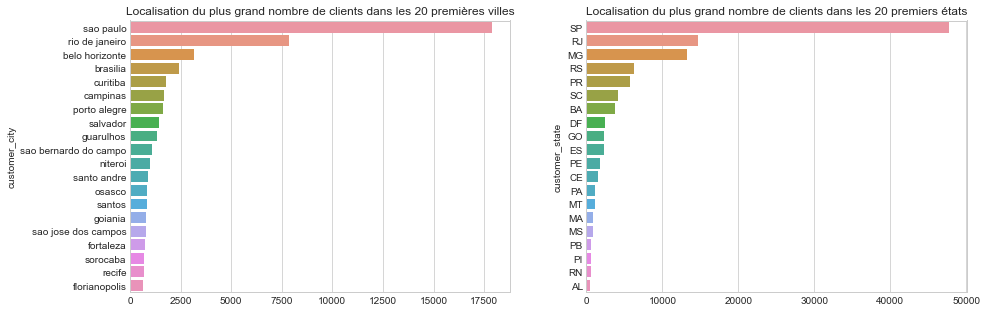

In [98]:
city_customers = data_net.groupby(['customer_city']).count()['customer_state'].sort_values(
                                                                                          ascending=False).head(20)
state_customers = data_net.groupby(['customer_state']).count()['customer_city'].sort_values(
                                                                                          ascending=False).head(20)
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
plt.title("Localisation du plus grand nombre de clients dans les 20 premières villes")
sns.barplot(x = city_customers.values, y = city_customers.index)
fig.add_subplot(122)
plt.title("Localisation du plus grand nombre de clients dans les 20 premiers états")
sns.barplot(x = state_customers.values, y = state_customers.index)
plt.show()

In [99]:
data_net.columns

Index(['order_id', 'order_item_id', 'product_id', 'price', 'freight_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'sales', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_score_mean', 'payment_sequential_count',
       'payment_installments_sum', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'product_category_name'],
      dtype='object')

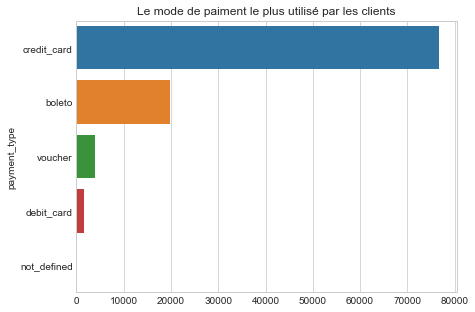

In [100]:
#cat_customers = categ.groupby(['Most_purchased_categ']).count()['customer_city'].sort_values(
#                                                                                          ascending=False).head(20)
mode_payment = payment_method.groupby(['payment_type']).count()['payment_installments'].sort_values(ascending=False)

fig = plt.figure(figsize=(15,5))
#fig.add_subplot(121)
#plt.title("Les produits les plus achetés par les clients")
#sns.barplot(x = cat_customers.values,y = cat_customers.index)
fig.add_subplot(122)
plt.title("Le mode de paiment le plus utilisé par les clients")
sns.barplot(x = mode_payment.values, y = mode_payment.index)
plt.show()

On observe qu'on a plus de 90% environs d'internautes qui paient en carte sur le site. On peut juger que cette variable n'est pas pertinente pour notre projet.
On constate qu'on a beaucoup d'articles référencés sur le site et que le plus vendu est "bed_bath_table". On va essayer de classer ces articles dans une catégorie pour afficher une distribution plus simple du type de catégorie de produit qui est vendu et à quelle proportion.

J'ai visité le site d'amazon  pour avoir une liste de catégorie pour y inclure mes articles.
- media;
- high_tech;
- toys;
- food and groceries;
- kitchen;
- home;
- "DIY and garden";
- "beauty, health and well_being";
- "clothing";
- "sports and hobbies";
- others

In [101]:
data_net["product_category_name"].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [102]:
data_net["main_category"] = np.where((data_net["product_category_name"].str.contains("clothing|fash|accessorie|bag|shoes|luggage")==True),
                                    "clothing and accessories",
                           np.where((data_net["product_category_name"].str.contains("health|beauty|perfumer|diaper|hygiene|baby")==True),
                                    "beautyand  health",
                           np.where((data_net["product_category_name"].str.contains("toy")==True),
                                    "toys",
                           np.where((data_net["product_category_name"].str.contains("home|cuisine|kitchen|dining|house|furniture|houseware|bed|bath|table|office|appliances|air|living|bedroom|mattress|room")==True),
                                    "home",
                           np.where((data_net["product_category_name"].str.contains("book|game|stationner|photo|music|cd|dvd|media")==True),
                                     "media",
                           np.where((data_net["product_category_name"].str.contains("grocer|food|drink")==True), 
                                     "food and groceries",
                           np.where((data_net["product_category_name"].str.contains("computer|tablet|electronic|console|telephon|tele|phon")==True), 
                                     "high_tech",
                           np.where((data_net["product_category_name"].str.contains("stuff|decor|pet|watch|party|flower|christmas")==True), 
                                     "stuff and gifts",
                           np.where((data_net["product_category_name"].str.contains("garden|tool|construction")==True),
                                     "diy and garden",
                           np.where((data_net["product_category_name"].str.contains("sport|leisure")==True),
                                     "sports and hobbies",
                                     "various"))))))))))

In [103]:
data_net[data_net['product_category_name'].str.contains("leisure")==True]

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,sales,...,customer_city,customer_state,review_score_mean,payment_sequential_count,payment_installments_sum,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name,main_category
962,0009792311464db532ff765bf7b182ae,1.0,8cab8abac59158715e0d70a36c807415,99.9,27.65,2a30c97668e81df7c17a8b14447aeeba,delivered,2018-08-14 20:43:09,2018-08-22 12:02:27,8.0,...,alfenas,MG,5.0,1.0,1.0,56.0,1392.0,4.0,sports_leisure,sports and hobbies
963,28116a9f673362aaa7a4349192ad5e61,1.0,8cab8abac59158715e0d70a36c807415,99.9,16.70,1915e15858cfdff3c6e7417640ebc5ea,delivered,2017-05-24 12:17:36,2017-06-01 12:33:30,5.0,...,sao jose do rio preto,SP,4.0,1.0,10.0,56.0,1392.0,4.0,sports_leisure,sports and hobbies
985,000c3e6612759851cc3cbb4b83257986,1.0,b50c950aba0dcead2c48032a690ce817,99.0,13.71,3773bcf1a6fbd29233ea1c1b573c4f22,delivered,2017-08-12 10:08:57,2017-08-19 15:22:17,8.0,...,jundiai,SP,5.0,1.0,1.0,58.0,2584.0,1.0,sports_leisure,sports and hobbies
986,0c00eb38b29dd352b15a6ee44f8a531a,1.0,b50c950aba0dcead2c48032a690ce817,99.0,29.09,616c98205174419827715be4466f8ef5,delivered,2017-09-28 10:46:42,2017-10-11 22:43:46,9.0,...,fortaleza,CE,5.0,1.0,2.0,58.0,2584.0,1.0,sports_leisure,sports and hobbies
987,25dae1a0efc5bba5a14622eaf552ad78,1.0,b50c950aba0dcead2c48032a690ce817,99.0,29.09,868884e6ad80e650949473ce7f88d29a,delivered,2018-01-08 08:53:22,2018-01-23 22:25:54,1.0,...,acopiara,CE,5.0,1.0,1.0,58.0,2584.0,1.0,sports_leisure,sports and hobbies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113214,NaN,NaN,42629edd68bffc7993ce24e1a86ebc96,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,51.0,463.0,2.0,sports_leisure,sports and hobbies
113215,NaN,NaN,47d85e3e35a3e29f93fdc12b295d520c,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,26.0,446.0,1.0,sports_leisure,sports and hobbies
113216,NaN,NaN,4ed545d4c0dcea0798b3bafcd081ebff,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,51.0,1771.0,1.0,sports_leisure,sports and hobbies
113217,NaN,NaN,03b10f5e3ef07cfc27a025adca3fd0be,NaN,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,44.0,3364.0,1.0,sports_leisure,sports and hobbies


In [104]:
data_net["main_category"].unique()

array(['stuff and gifts', 'home', 'beautyand  health', 'diy and garden',
       'high_tech', 'media', 'clothing and accessories',
       'sports and hobbies', 'food and groceries', 'various', 'toys'],
      dtype=object)

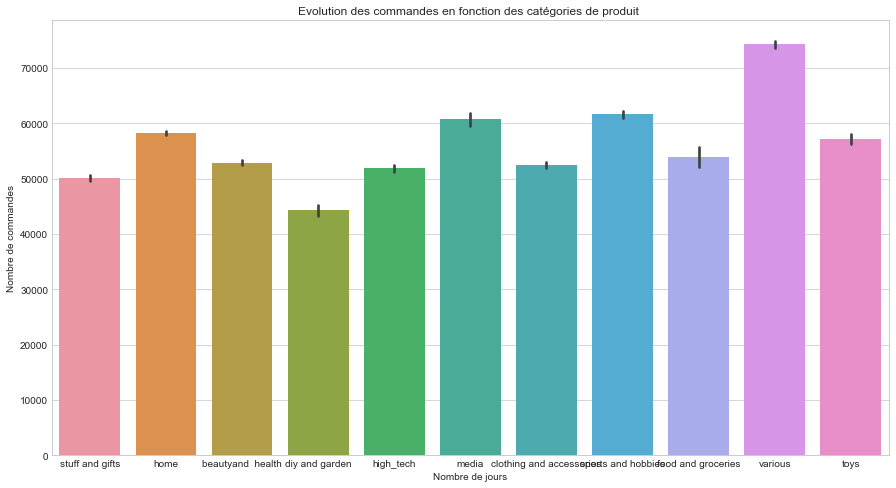

In [105]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(x = data_net["main_category"].values,y = data_net["main_category"].index)
#ax = data_net["main_category"].plot(color="b", kind="bar")
plt.ylabel("Nombre de commandes")
plt.xlabel("Nombre de jours")
plt.title("Evolution des commandes en fonction des catégories de produit ")
plt.show()

In [106]:
# On va supprimer la variable "product_category_name"
data_net.drop("product_category_name", axis=1, inplace=True)

In [107]:
data_net.dtypes

order_id                                 object
order_item_id                           float64
product_id                               object
price                                   float64
freight_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
sales                                   float64
customer_unique_id                       object
customer_zip_code_prefix                float64
customer_city                            object
customer_state                           object
review_score_mean                       float64
payment_sequential_count                float64
payment_installments_sum                float64
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
main_category                           

In [108]:
# Quantité de commande par client
#data_cpc = data_net.groupby("customer_unique_id")['order_id'].count()
#data_cpc = data_net.groupby("customer_unique_id").agg({"order_id": "nunique"})
#data_cpc

In [109]:
# Quantité de commande par client et date d'achat
#data_cpc = data_net.groupby("customer_unique_id")['order_id'].count()
#data_cpc = data_net.groupby("customer_unique_id").agg({"order_id": "nunique","order_purchase_timestamp":"mean"})
data_cpc = data_net.groupby("customer_unique_id").agg({"order_id": "nunique","order_purchase_timestamp":lambda date: (date)})
data_cpc

,order_id,order_purchase_timestamp
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1,[]
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16


In [110]:
data_net.dtypes

order_id                                 object
order_item_id                           float64
product_id                               object
price                                   float64
freight_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
sales                                   float64
customer_unique_id                       object
customer_zip_code_prefix                float64
customer_city                            object
customer_state                           object
review_score_mean                       float64
payment_sequential_count                float64
payment_installments_sum                float64
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
main_category                           

In [111]:
#Sauvegarde des données data_net
data_customer = data_net.copy(deep=True)

In [112]:
data_net = pd.merge(data_net, data_cpc,
                how="outer",
                on="customer_unique_id")

In [113]:
data_net.head(5)

,order_id_x,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp_x,order_delivered_customer_date,sales,...,customer_state,review_score_mean,payment_sequential_count,payment_installments_sum,product_name_lenght,product_description_lenght,product_photos_qty,main_category,order_id_y,order_purchase_timestamp_y
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,9.0,...,RJ,5.0,1.0,2.0,58.0,598.0,4.0,stuff and gifts,1.0,2017-09-13 08:59:02
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-07-13 20:39:29,6.0,...,GO,5.0,1.0,1.0,58.0,598.0,4.0,stuff and gifts,1.0,2017-06-28 11:52:20
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-06-04 18:34:26,5.0,...,MG,4.0,1.0,2.0,58.0,598.0,4.0,stuff and gifts,1.0,2018-05-18 10:25:53
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-09 21:26:33,8.0,...,PR,5.0,1.0,3.0,58.0,598.0,4.0,stuff and gifts,1.0,2017-08-01 18:38:42
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-24 20:04:21,8.0,...,MG,5.0,1.0,4.0,58.0,598.0,4.0,stuff and gifts,1.0,2017-08-10 21:48:40


In [114]:
del data_net["order_purchase_timestamp_y"]

In [115]:
data_net.dtypes

order_id_x                               object
order_item_id                           float64
product_id                               object
price                                   float64
freight_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp_x       datetime64[ns]
order_delivered_customer_date    datetime64[ns]
sales                                   float64
customer_unique_id                       object
customer_zip_code_prefix                float64
customer_city                            object
customer_state                           object
review_score_mean                       float64
payment_sequential_count                float64
payment_installments_sum                float64
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
main_category                           

In [116]:
#Dataset client
data_customer = data_customer.groupby("customer_unique_id").agg({"price": "sum",
                                                                 "freight_value": "sum",
                                                                 "payment_sequential_count": "mean", 
                                                                 "payment_installments_sum": "mean", 
                                                                 "review_score_mean": "mean",
                                                                              "sales": "sum"     })

In [117]:
# On va merger avec d'autres features
data_customer = pd.merge(data_customer, avg_delivery_time,
                how="outer",
                on="customer_unique_id")

data_customer = pd.merge(data_customer, data_cpc,
                how="outer",
                on="customer_unique_id")

data_customer = pd.merge(data_customer, qte_produits,
                how="outer",
                on="customer_unique_id")
data_customer = pd.merge(data_customer, avg_purchases,
                how="outer",
                on="customer_unique_id")

data_customer = pd.merge(data_customer, Avg_qty_prod,
                how="outer",
                on="customer_unique_id")

In [118]:
data_customer = pd.merge(data_customer, date_purchase['last_purchase_delay'],
                how="outer",
                on="customer_unique_id")

Text(0.5, 1.0, "Evolution du nombre d'échéance par client")

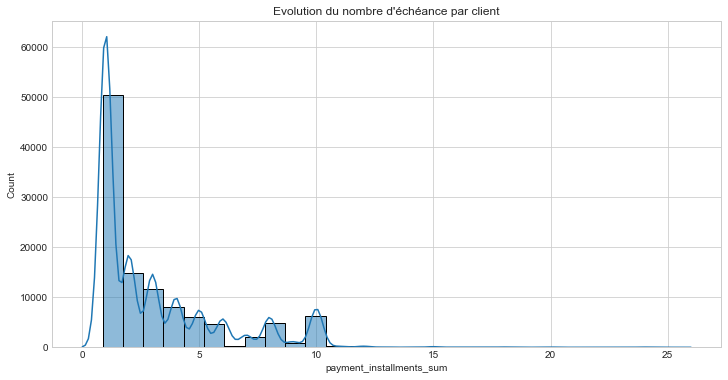

In [119]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["payment_installments_sum"],kde=True, bins=30)
plt.title("Evolution du nombre d'échéance par client")

Text(0.5, 1.0, 'Evolution des différents types de moyen de paiement par client')

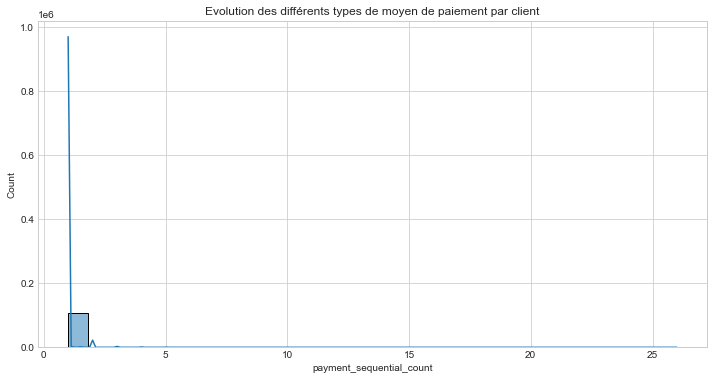

In [120]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["payment_sequential_count"],kde=True, bins=30)
plt.title("Evolution des différents types de moyen de paiement par client")

Text(0.5, 1.0, 'Evolution du délai de livraison par client')

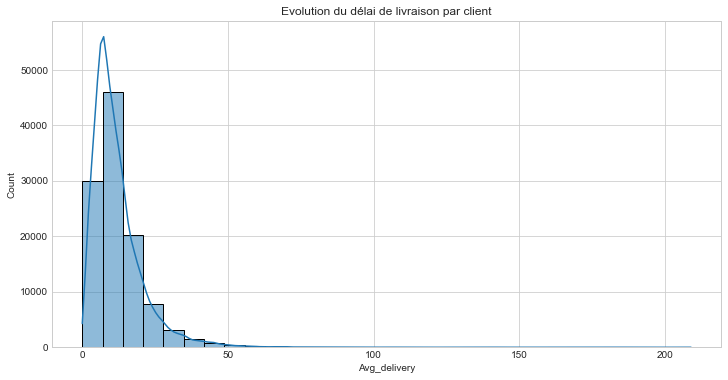

In [121]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["Avg_delivery"],kde=True, bins=30)
plt.title("Evolution du délai de livraison par client")

Text(0.5, 1.0, "Evolution du montant d'achat par client")

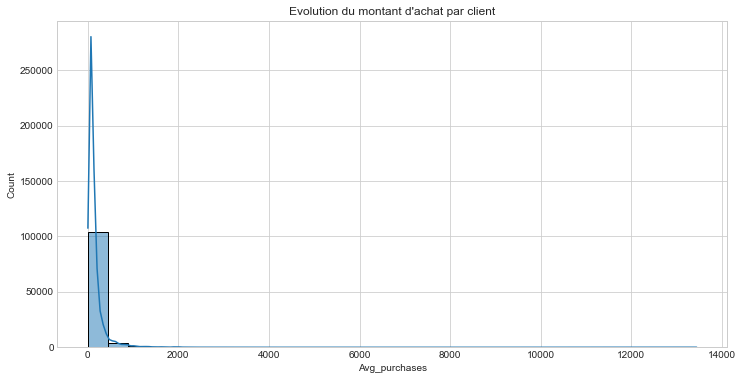

In [122]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["Avg_purchases"],kde=True, bins=30)
plt.title("Evolution du montant d'achat par client")

Text(0.5, 1.0, "Evolution de la quantité d'article par commande par client")

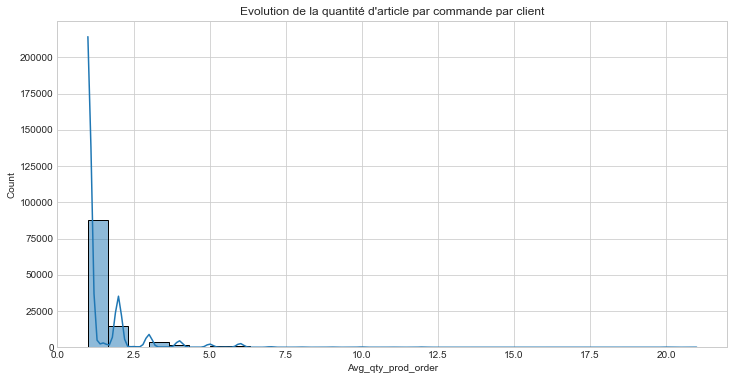

In [123]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["Avg_qty_prod_order"],kde=True, bins=30)
plt.title("Evolution de la quantité d'article par commande par client")

Text(0.5, 1.0, 'Evolution du délai depuis le dernier achat par client')

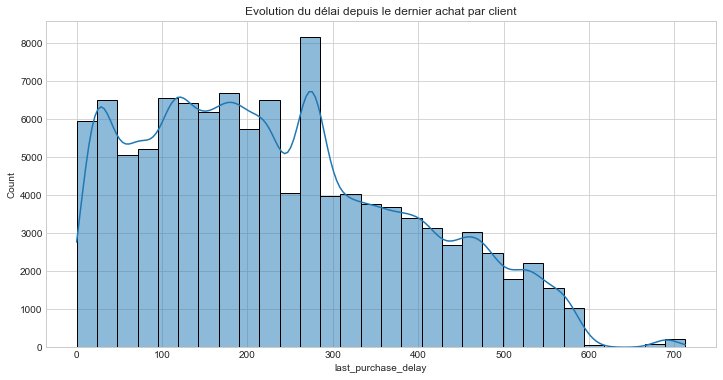

In [124]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["last_purchase_delay"],kde=True, bins=30)
plt.title("Evolution du délai depuis le dernier achat par client")

Text(0.5, 1.0, 'Evolution du cout du fret par client')

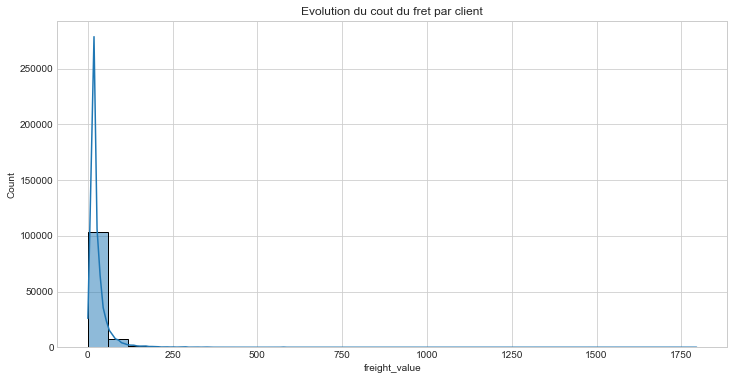

In [125]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["freight_value"],kde=True, bins=30)
plt.title("Evolution du cout du fret par client")

Text(0.5, 1.0, 'Evolution de la note par client')

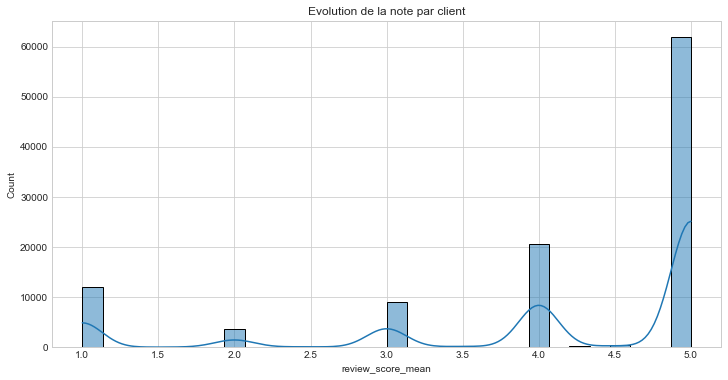

In [126]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["review_score_mean"],kde=True, bins=30)
plt.title("Evolution de la note par client")

Text(0.5, 1.0, "Evolution du montant d'achat par client")

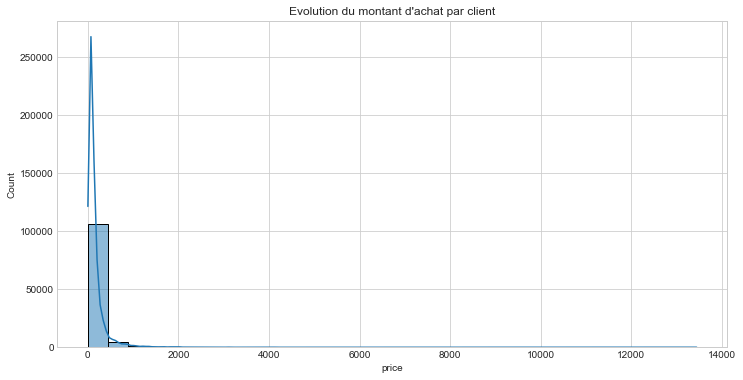

In [127]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["price"],kde=True, bins=30)
plt.title("Evolution du montant d'achat par client")

Text(0.5, 1.0, 'Evolution de la quantité de produits achetés par client')

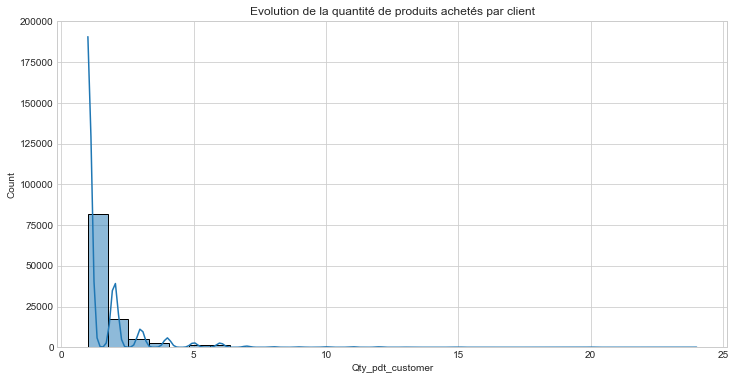

In [128]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=data_customer["Qty_pdt_customer"],kde=True, bins=30)
plt.title("Evolution de la quantité de produits achetés par client")

In [129]:
#data_customer['order_purchase_timestamp'] = data_customer['order_purchase_timestamp'].astype('datetime64')
data_customer.head(3)

,price,freight_value,payment_sequential_count,payment_installments_sum,review_score_mean,sales,Avg_delivery,order_id,order_purchase_timestamp,Qty_pdt_customer,Avg_purchases,Avg_qty_prod_order,last_purchase_delay
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.9,12.00,1.0,8.0,5.0,5.0,6.0,1,2018-05-10 10:56:27,1.0,129.9,1.0,111.0
0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,8.29,1.0,1.0,4.0,5.0,3.0,1,2018-05-07 11:11:27,1.0,18.9,1.0,114.0
0000f46a3911fa3c0805444483337064,69.0,17.22,1.0,8.0,3.0,3.0,25.0,1,2017-03-10 21:05:03,1.0,69.0,1.0,536.0


In [130]:
data_customer.shape

(112935, 13)

In [131]:
data_customer.dtypes

price                       float64
freight_value               float64
payment_sequential_count    float64
payment_installments_sum    float64
review_score_mean           float64
sales                       float64
Avg_delivery                float64
order_id                      int64
order_purchase_timestamp     object
Qty_pdt_customer            float64
Avg_purchases               float64
Avg_qty_prod_order          float64
last_purchase_delay         float64
dtype: object

In [132]:
data_customer.isna().sum()

price                          0
freight_value                  0
payment_sequential_count    2741
payment_installments_sum    2741
review_score_mean           3519
sales                          0
Avg_delivery                2738
order_id                       0
order_purchase_timestamp    2720
Qty_pdt_customer            2738
Avg_purchases               2738
Avg_qty_prod_order          2738
last_purchase_delay         2738
dtype: int64

In [133]:
# On va supprimer les lignes vides s'il y en a
lignes_vides =data_customer.index[data_customer.isnull().all(axis=1)]
data_customer.drop(lignes_vides,axis=0,inplace=True)

In [134]:
data_customer.shape

(112935, 13)

In [135]:
#On affiche les indexs contenants des "Nan"
index_with_nan = data_customer.index[data_customer.isnull().any(axis=1)]
print(index_with_nan)

Index(['001ae44fa04911a9e9577356dce6c63c', '0029bd580d3012618731f5abb174a07f',
       '004ad212c650c96c8a48f30855a7bcb8', '0071f46a072a9ae25bbe4438b15efe9c',
       '009a0802534f904b40b9d512b49794e1', '009b0127b727ab0ba422f6d9604487c7',
       '00bee19e1199bc5cede1c674177b9e22', '00ca7e6a87ceddccce3ff015000be61b',
       '00e872ca2fc94e59982286e69f186e0e', '00f0b70fdcb8a6e1671b52a2472bd41f',
       ...
       'ffa0ba4c9a6a0763879efe7c2b8d5b93', 'ffa652b0cdf8bba29664149a9e579134',
       'ffb3cbd5e1e507679e2db84c515410a5', 'ffb5431b49b42c9f3209f087e1bfdcfa',
       'ffc4233210eac4ec1711a8b847196d4e', 'ffca77d46c6d7d815549a5e4482dba2f',
       'ffdde6e4dcb6ec3a882cfc6cddef7996', 'ffe0c10afc687bcf34a0451f2b87dd9b',
       'ffe6305176b9431a3eda3cf8904d7eb7', 'fffcc512b7dfecaffd80f13614af1d16'],
      dtype='object', name='customer_unique_id', length=3522)


In [136]:
# On va supprimer les lignes contenants des NaN
data_customer.drop(index_with_nan,axis=0,inplace=True)

In [137]:
data_customer.shape

(109413, 13)

In [138]:
data_customer.isna().sum()

price                       0
freight_value               0
payment_sequential_count    0
payment_installments_sum    0
review_score_mean           0
sales                       0
Avg_delivery                0
order_id                    0
order_purchase_timestamp    0
Qty_pdt_customer            0
Avg_purchases               0
Avg_qty_prod_order          0
last_purchase_delay         0
dtype: int64

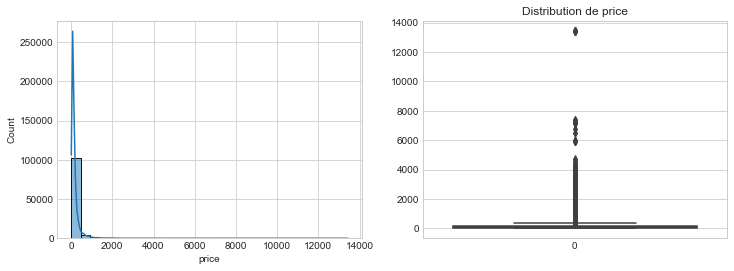

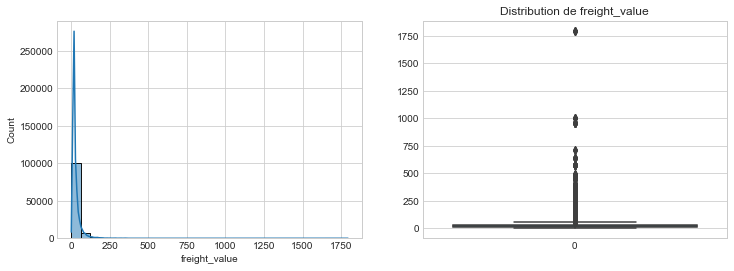

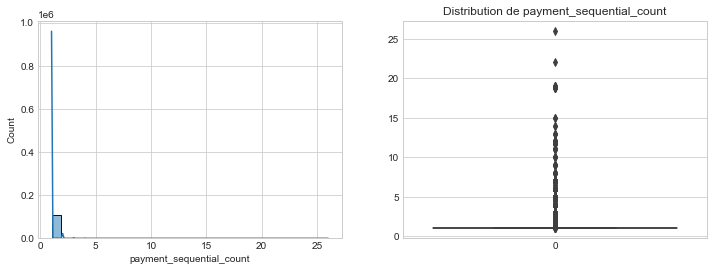

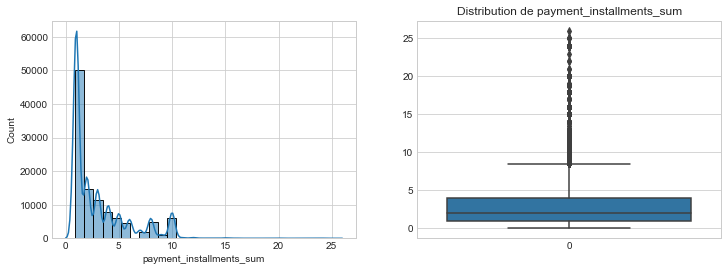

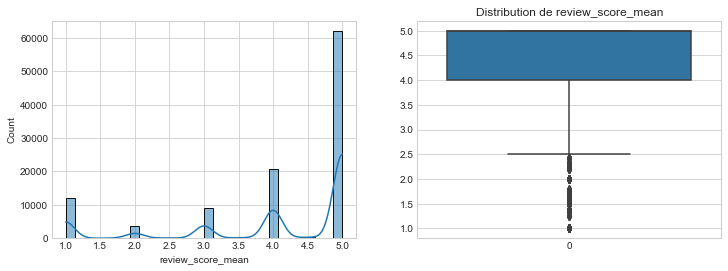

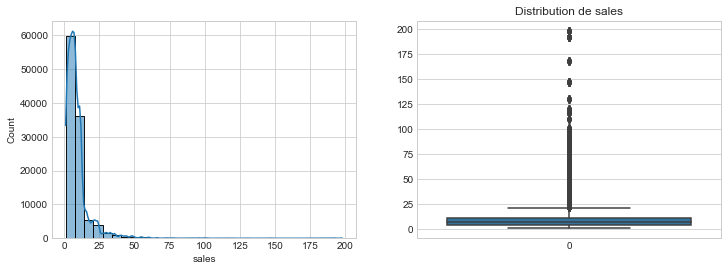

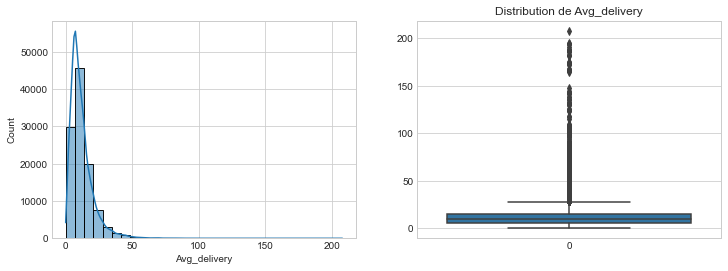

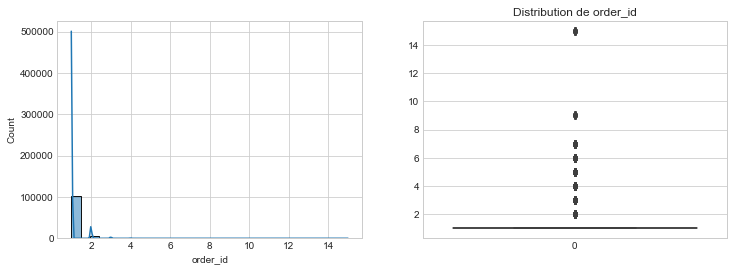

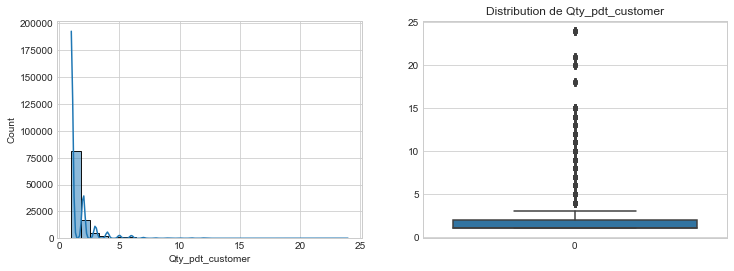

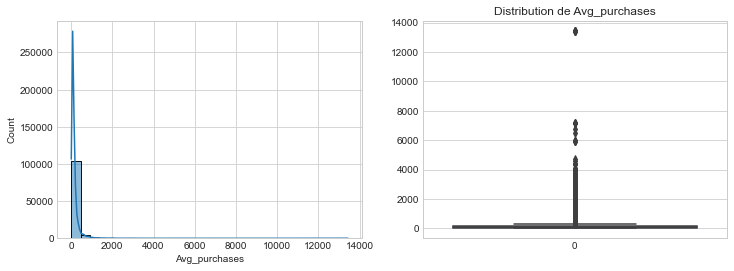

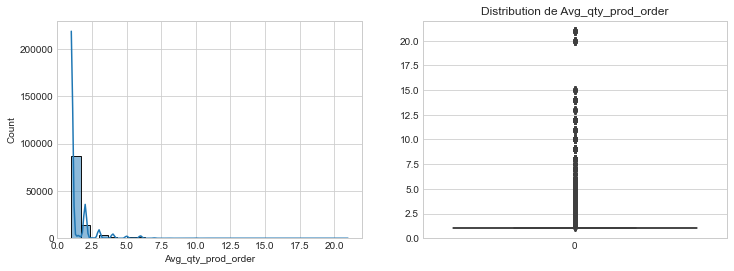

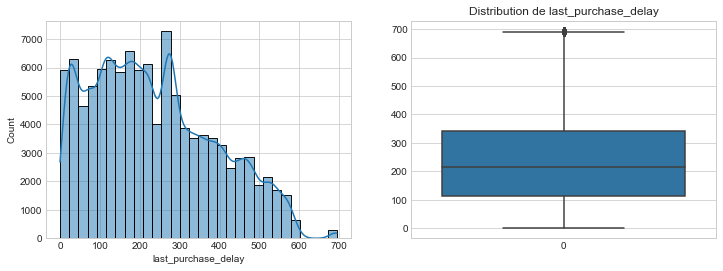

In [139]:
for column in data_customer.select_dtypes(['int64', 'float64']).columns:
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.histplot(data=data_customer[column],kde=True, bins=30, ax=axes[0])
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.boxplot(data=data_customer[column], ax=axes[1])
    plt.show()

### Les corrélations linéaires

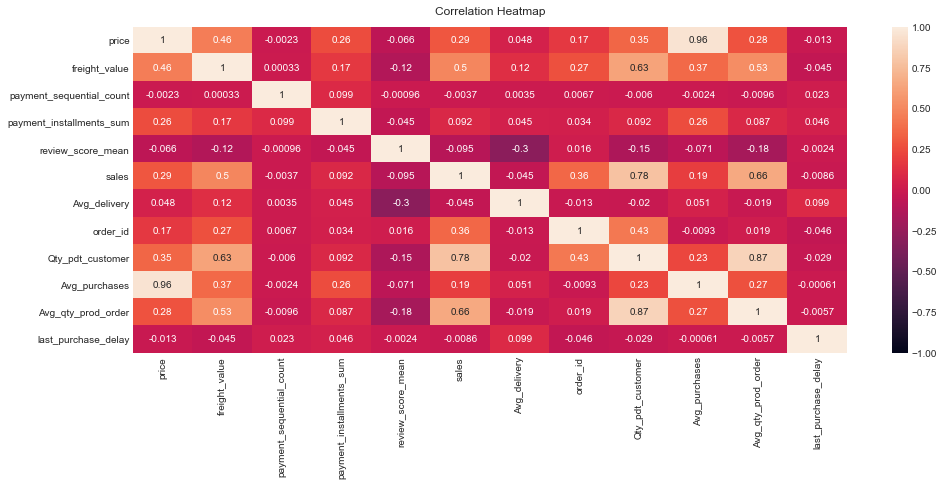

In [140]:
# taille de la heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_customer.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

On constate qu'il y a quelques variables qui sont bien corrélées.

## Exportation du jeu de données

In [141]:
data_customer.to_csv("data_nettoye.csv")

In [142]:
data_net.to_csv("data_init.csc")